In [1]:
import numpy    as np
from numpy.testing._private.utils import decorate_methods
import pandas   as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import sklearn  as skl
import time

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import set_config

In [16]:
# read data
data = pd.read_csv(r'data\london_merged.csv')
data.sample(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
14361,2016-08-28 04:00:00,206,19.5,19.5,80.5,17.5,3.0,0.0,1.0,1.0
4398,2015-07-06 17:00:00,4501,23.0,22.0,41.0,18.0,1.0,0.0,0.0,1.0
16123,2016-11-11 04:00:00,49,6.0,3.0,81.0,13.0,4.0,0.0,0.0,2.0
6505,2015-10-03 01:00:00,430,12.0,12.0,82.0,5.0,2.0,0.0,1.0,2.0
15345,2016-10-09 17:00:00,1573,14.0,14.0,61.0,6.0,2.0,0.0,1.0,2.0


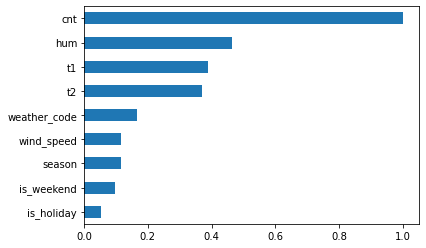

In [18]:
# correlation
data.corr()["cnt"].abs().sort_values().plot.barh()
plt.show()

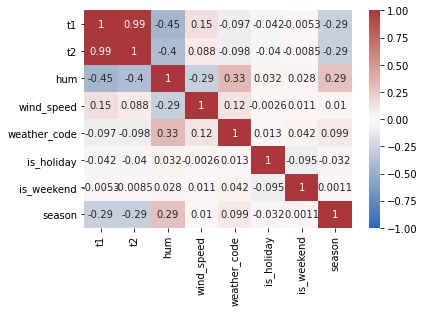

In [14]:
# check correlation matrix
matrix = data.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [13]:
# clean data
target = data['cnt']
print(target.shape)

# axis = 1 is column
data = data.drop(['cnt'], axis = 1)
print(data.shape)

(17414,)
(17414, 9)


In [19]:
# Take a look at nulls 0 nulls
print(target.isnull().sum())
print(data.isnull().sum())

0
timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


In [25]:
# [:4] used to print year (with fully, if you change it will print half)
# it print because it given in first
data['year'] = data['timestamp'].apply(lambda row: row[:4])
data['year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
17409    2017
17410    2017
17411    2017
17412    2017
17413    2017
Name: year, Length: 17414, dtype: object

In [48]:
data['timestamp'].str.split('-')[0][-1][:2]

'04'

In [49]:
# [-1] is index, [:2] is value or total number we want to print
data['month'] = data['timestamp'].apply(lambda row: row.split('-')[1][:2] )
data['month']

0        01
1        01
2        01
3        01
4        01
         ..
17409    01
17410    01
17411    01
17412    01
17413    01
Name: month, Length: 17414, dtype: object

In [59]:
data['timestamp'].str.split(':')[0][-3]

'2015-01-04 00'

In [60]:
# [-2:] is giving least beginning values
data['hour'] = data['timestamp'].apply(lambda row: row.split(':')[-3][-2:] )
data['hour']

0        2015-01-04 
1        2015-01-04 
2        2015-01-04 
3        2015-01-04 
4        2015-01-04 
            ...     
17409    2017-01-03 
17410    2017-01-03 
17411    2017-01-03 
17412    2017-01-03 
17413    2017-01-03 
Name: hour, Length: 17414, dtype: object